## K-means in loan prediction dataset

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### preprocessing and modelling

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df = data.drop('Self_Employed', axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [34]:

df = data.drop(["Self_Employed","Property_Area",'Married','Loan_Amount_Term', 'Dependents','Education','Gender','Loan_Status','Credit_History'], axis=1)
# df = data.drop([], axis=1)
df.head(20)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
0,LP001003,4583,1508.0,128.0
1,LP001005,3000,0.0,66.0
2,LP001006,2583,2358.0,120.0
3,LP001008,6000,0.0,141.0
4,LP001013,2333,1516.0,95.0
5,LP001024,3200,700.0,70.0
6,LP001027,2500,1840.0,109.0
7,LP001029,1853,2840.0,114.0
8,LP001030,1299,1086.0,17.0
9,LP001032,4950,0.0,125.0


In [35]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.70746877,  0.09869541,  0.81257519],
       [-0.40893221, -0.5463709 , -1.37659578],
       [-0.70301888,  0.4622938 ,  0.53010151],
       ...,
       [-0.47945659, -0.5463709 , -1.20004974],
       [ 0.37106746, -0.5463709 , -2.29463522],
       [ 0.70746877, -0.5463709 ,  0.98912123]])

In [36]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 0 2 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 0 0 0 0 2 0 2 0 2 2 2 2 0 0
 0 2 2 2 0 0 0 0 0 2 2 0 2 2 0 2 2 2 0 0 2 2 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0
 2 0 2 0 2 0 2 2 0 2 2 2 2 0 2 0 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 0 0 2 0 0
 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 0 2 0 0 2 2 2
 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 2 2 2 0 2 0 0 2 0 0 2 2 0 0 0 0 0 2 0 2 0
 2 2 2 0 0 0 2 0 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 2 2 2 0 0 0 2 0
 2 2 0 2 0 0 2 2 2 2 0 0 2 0 2 2 2 0 2 2 2 0 0 2 0 0 0 2 2 0 0 0 2 2 1 2 2
 0 2 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 0 0 0 0 2 2 0 2 0 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 2 2 2
 0 2 2 2 0 2 2 0 2 2 0 2 2 0 2 0 0 2 0 2 2 2 2 0 2 0 2 2 0 0 0 1 2 2 0 0 2
 2 2 0 0 2 2 2 0 2 2 2]


In [38]:
df["Clus_km"] = labels
df.head(5)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Clus_km
0,LP001003,4583,1508.0,128.0,2
1,LP001005,3000,0.0,66.0,2
2,LP001006,2583,2358.0,120.0,0
3,LP001008,6000,0.0,141.0,2
4,LP001013,2333,1516.0,95.0,0


In [39]:
df.groupby('Clus_km').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Clus_km,,,
0,2858.127072,2271.866298,110.939227
1,2168.000000,26918.500000,96.500000
2,4253.858586,109.076364,99.631313


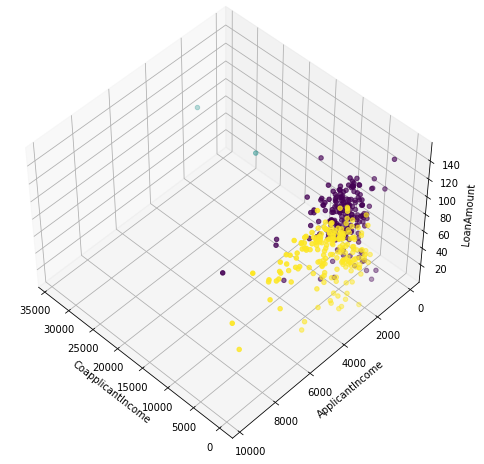

In [46]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('CoapplicantIncome')
ax.set_ylabel('ApplicantIncome')
ax.set_zlabel('LoanAmount')

ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= labels.astype(np.float))
